### Tópicos adcionais

#### Carregando Arquivos Numéricos

Freqüentemente, precisamos carregar arquivos contendo dados numéricos em uma matriz NumPy para processamento e exibição adicionais. Esses arquivos de dados geralmente consistem em: 

- Informações do cabeçalho. Isso descreve o que os dados representam e como eles são formatados.
- Um conjunto de linhas de dados numéricos. Cada linha contém o mesmo número de valores, separados por alguma string, como uma vírgula ou tabulação.

A função NumPy numpy.loadtxt pode ser usado para carregar esses dados. Isso retorna uma matriz NumPy, onde cada linha corresponde a uma linha no arquivo de dados. O primeiro argumento para esta função é o nome do arquivo de dados. Alguns dos argumentos de palavra-chave opcionais são mostrados abaixo.

- tipo d. Este é o tipo de dados dos valores na matriz, que são flutuantes por padrão.
- delimitador. Esta é a string usada para separar valores em cada linha. Por padrão, qualquer espaços em branco, como espaços ou tabulações, são considerados delimitadores.
- saltos. Este é o número de linhas a serem ignoradas no início do arquivo antes da leitura dos dados. Geralmente é usado para ignorar as informações do cabeçalho e o padrão é 0.

In [1]:
# Importe a função loadtxt

from numpy import loadtxt

In [2]:
# Carregue o arquivo ”weather.dat”, pulando a primeira linha e criando uma matriz 2 × 3 de inteiros. 
# Para floats, o argumento dtype não seria usado.

data= loadtxt('data/weather.dat', dtype=int, skiprows=1)
print(data)

[[ 1 77 56]
 [ 2 79 62]]


### Images

Matplotlib fornece funções para salvar, ler e exibir imagens. Essas imagens são arrays NumPy bidimensionais ou
tridimensionais. Em ambos os casos, os dois primeiros eixos do array correspondem às linhas e colunas da imagem. O
terceiro eixo corresponde à cor do pixel em cada coordenada (coluna, linha).

- • Para uma matriz 2D, os valores da matriz são flutuantes no intervalo [0, 1]. Estes representam a luminância (brilho) de uma imagem em tons de cinza de preto (0) a branco (1).
- Para uma matriz 3D, o terceiro eixo pode ter 3 ou 4 elementos. Em ambos os casos, os três primeiros elementos correspondem aos componentes vermelho, verde e azul da cor do pixel. Eles podem ser flutuantes no intervalo [0, 1] ou inteiros de 8 bits do tipo 'uint8'.

Um quarto elemento corresponde a um valor “alfa” que representa a transparência.

As principais funções que utilizamos são: 

- eu estou lendo Ler um arquivo de imagem em uma matriz.
- imsave Salve uma imagem em um arquivo.
- imshow Exibir uma matriz de imagens.

O exemplo a seguir cria uma imagem como uma matriz 3D NumPy de flutuadores. Os componentes de cor vermelho, verde e azul da imagem são então definidos diretamente usando fatiamento de matriz.

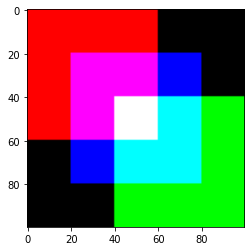

In [3]:
import numpy as np # Importar zeros
import matplotlib.pyplot as plt # Import imsave, imread, imshow

img = np.zeros((100, 100, 3)) # Crie uma matriz de imagem de 100 linhas e colunas.

img[:60,:60,0] = 1. # Defina o canto superior esquerdo como vermelho.
img[40:,40:,1] = 1. # Defina o canto inferior direito como verde.
img[20:80,20:80,2] = 1. # Defina o quadrado central para azul.

plt.imsave("data/squares.png", img) # Salva o array img no arquivo "squares.png

img2 = plt.imread("./data/squares.png") # Lê o arquivo de volta no array

plt.imshow(img2) # Mostra a imagem

#### Animação

Uma animação consiste em uma sequência de quadros que são exibidos um após o outro. A animação usando Matplotlib envolve essencialmente atualizar os dados associados a algum objeto ou objetos desenhados (como pontos ou linhas) e redesenhar esses objetos. A produção de uma animação envolve, portanto, as seguintes etapas:

- Configure as variáveis e estruturas de dados relacionadas à animação.
- Desenhe o primeiro quadro.
- Atualize repetidamente o quadro com novos dados.

As animações são geradas usando FuncAnimation do matplotlib.animation módulo. Isso leva os seguintes argumentos necessários:

- fig. Esta é a figura na qual a animação deve ser desenhada. Ele pode ser obtido usando a figura do Matplotlib ou subtramas funções.
- func. Isso especifica a função a ser chamada para executar uma única etapa da animação. Deve ter um único argumento que é o número do quadro (um inteiro). O número do quadro é usado para atualizar os valores dos objetos desenhados, como pontos ou linhas. Se o argumento da palavra-chave blit for True, esta função deve retornar uma tupla dos objetos modificados que precisam ser redesenhados.

FuncAnimation também aceita os seguintes argumentos de palavra-chave. 

- molduras. Um inteiro especificando o número de quadros a serem gerados.
- função de inicialização. Isso especifica a função que é chamada uma vez no início para desenhar o plano de fundo comum a todos os quadros. Se o argumento da palavra-chave blit for True, esta função também deve retornar uma tupla dos objetos modificados que precisam ser redesenhados.
- intervalo. Este argumento especifica o tempo (em ms) de espera entre desenhos sucessivos quadros.
- blit. Se True, a animação apenas redesenha as partes do enredo que foram alteradas. Isso pode ajudar a garantir que os quadros sucessivos sejam exibidos rapidamente.
- repetir. Se True (o padrão), a animação se repetirá desde o início assim que está terminado.

O exemplo a seguir para Jupyter Notebook anima um ponto circulando a origem com velocidade angular constante. A função animar é definida para atualizar a posição do ponto com base no número do quadro.

In [4]:
%matplotlib 
# %matplotlib não embutido

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation

omega = .02 # Velocidade angular
fig, ax = plt.subplots(figsize=(4,4)) # Obtenha a figura e os eixos para o gráfico
ax.set_aspect('equal') # Faz com que os eixos tenham o mesmo

point, = plt.plot([], [], 'ro', ms=10) # point" é o objeto desenhado por plot

plt.xlim(-1.5,1.5) # observe que "plot" retorna uma tupla
plt.ylim(-1.5,1.5) # Definir limites para toda a animação

# Função de inicialização. Isso é chamado uma vez para plotar o plano de fundo
def init():
    point.set_data([], [])
    return point, # Retorna uma tupla dos objetos modificados

# Função de animação. Isso é chamado uma vez por etapa de animação.
# inteiro i é o número do quadro

def animate(i):
    x = np.cos(i*omega)
    y = np.sin(i*omega)
    point.set_data(x, y) # Atualize as coordenadas x, y do ponto
    return point, # Retorne a tupla dos objetos modificados

# Inicia o animador com uma chamada para "FuncAnimation"
animation.FuncAnimation(fig, animate, init_func=init, frames=100, interval=20)

Using matplotlib backend: <object object at 0x000002092E4AE750>


Observe que no Jupyter Notebook, a mágica do IPython que precisamos usar é %matplotlib em vez de %matplotlib inline. Os gráficos embutidos no Jupyter Notebook são estáticos, o que significa que, uma vez desenhados, não podem ser atualizados. O uso de %matplotlib gera gráficos em uma janela separada, onde os dados atualizados podem ser exibidos.

#### Geração de Número Aleatório

O NumPy fornece uma biblioteca de funções para geração de números aleatórios no numpy.random módulo. les retornam uma amostra ou uma matriz de amostras de um determinado tamanho, extraídas de uma determinada distribuição de probabilidade. As principais funções que utilizamos são:

--corr_Code

Os exemplos a seguir ilustram o uso dessas funções.

In [5]:
# Use random.rand para gerar um único número retirado 
# uniformemente do intervalo [0, 1).

import numpy as np
print(np.random.rand())

0.6381671497919688


In [6]:
# Use random.rand para gerar ma matriz de 3 números aleatórios 
# extraídos de [0, 1).

print(np.random.rand(3))

[0.69812724 0.68950946 0.43716819]


In [7]:
# Use random.rand para gerar uma matriz 2 × 3 
# de números aleatórios extraídos de [0, 1).

print(np.random.rand(2, 3))

[[0.33256785 0.10107021 0.67101183]
 [0.55520076 0.47182865 0.09644834]]


In [8]:
# Use random.randint para gerar um inteiro extraído de {0, ..., 6}.

print(np.random.randint(7))

3


In [9]:
# Use random.randint para gerar uma matriz 2 × 4 
# de inteiros extraídos de {5, 6, 7, 8}.

print(np.random.randint(5, 9, size=(2, 4)))

[[6 7 6 5]
 [7 8 7 5]]


In [10]:
# Use random.randn para gerar uma matriz 
# de amostras extraídas da distribuição normal "padrão".

print(np.random.randn(3))

[-0.7683157   0.49969235 -0.78693588]


In [11]:
# Use random.normal para gerar uma amostra 
# extraída de uma distribuição normal com μ = 100, ÿ = 15.

print(np.random.normal(100, 15))

87.34844962928014


#### Arquivos de Som

O som é uma vibração que se propaga através de um meio como o ar como uma onda de pressão e deslocamento. Dispositivos de gravação, como microfones, convertem essa onda em um sinal elétrico. Esse sinal é então amostrado em intervalos regulares e convertido em uma sequência de números, que correspondem à amplitude da onda em determinados momentos.

O formato de arquivo WAV é um padrão para armazenar tais dados de áudio sem compressão. Os arquivos WAV contêm duas informações principais:

- A taxa na qual a onda foi amostrada, geralmente 44.100 vezes por segundo.
- Os dados de áudio, geralmente com 16 bits usados por amostra. Isso permite 216 = 65.536 diferentes níveis de amplitude a serem representados.

O módulo scipy.io.wavfile fornece funções para ler e gravar esses arquivos.

scipy.io.wavfile.read Leia um arquivo WAV, retornando a taxa de amostragem e os dados.

scipy.io.wavfile.write Escreva uma matriz NumPy como um arquivo WAV.

O exemplo a seguir cria e salva um arquivo WAV com uma única frequência no meio C e plota as primeiras 1.000 amostras dos dados.

In [12]:
import numpy as np # Importar linspace, sin
import matplotlib.pyplot as plt # Funções de plotagem
from scipy.io import wavfile

rate = 44100 # Número de amostras/segundo
end = 10 # O arquivo tem 10 segundos de duração
time = np.linspace(0, end, rate*end+1) # Os intervalos de tempo são 1/rate
freq = 261.625565 # Frequência de "middle C"
data = np.sin(2*np.pi*freq*time) # Gera a onda senoidal

wavfile.write("data/middleC.wav", rate, data) # Grava o array em um arquivo WAV

plt.plot(time[:1000], data[:1000]) # Plota as primeiras 1000 amostras
plt.show() # Finalmente, mostre a figura

#### Programação Linear

Os problemas de programação linear são uma classe especial de problemas de otimização. Eles envolvem encontrar o máximo (ou mínimo) de alguma função objetivo linear f(x) de um vetor de variáveis x = (x1, x2, . . . , xn), sujeito a um conjunto de restrições lineares de igualdade e desigualdade.

A função scipy.optimize.linprog implementa o "algoritmo simplex" que discutimos em aula para resolver este problema. Os argumentos para esta função são os valores c, Aub, bub, Aeq e beq dado acima. Um argumento opcional de limites representa o intervalo de valores permitidos que as variáveis podem assumir, com None usado para indicar nenhum limite.

A aplicação do linprog a este problema é feita conforme mostrado abaixo.

In [13]:
import numpy as np
from scipy.optimize import linprog

c = np.array([-2, -3]) # Coeficientes negativos de f(x)
A_ub = np.array([[1, 1], [1, 2]]) # Matriz dos coeficientes de desigualdade
b_ub = np.array([100, 160]) # Vetor dos limites superiores da desigualdade

bounds = [(0, 80), (0, None)] # Cada tupla é um resultado limitado (inferior, superior)
result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

print(result.x) # O campo "x" do resultado contém a solução

[40. 60.]


In [14]:
%reload_ext watermark
%watermark -a "Caique Miranda" -gu "caiquemiranda" -iv

Author: Caique Miranda

Github username: caiquemiranda

numpy     : 1.23.0
scipy     : 1.8.1
matplotlib: 3.5.2



: 

### End.